In [23]:
%matplotlib inline
from matplotlib.pyplot import *

import pandas as pd

from oanda_api import download_all_history
from pyoanda import Client, PRACTICE

In [16]:
data = download_all_history(
    pair="SPX500_USD",
    granularity="M", # Monthly
    num_bars=10000, # Lots
    fname="spx.csv",
)



fetching data, data so far: 0


In [30]:
data['date'] = pd.to_datetime(data.index)

In [26]:
data['close'] = (data['SPX500USD_closeAsk'].values +  data['SPX500USD_closeBid'].values) / 2.0

data['returns'] = 0
data.iloc[1:, list(data.columns).index('returns')] = (data.close.values[1:] - data.close.values[:-1]) / data.close.values[:-1]

long = 6
data['returns_long'] = np.nan
data.iloc[long:, list(data.columns).index('returns_long')] = (data.close.values[long:] - data.close.values[:-long]) / data.close.values[:-long]

signal = np.sign(data.returns_long.values)
signal[signal != 1] = 0

data['signal'] = 0
data.iloc[1:, list(data.columns).index('signal')] = signal[:-1]

data['trade_returns'] = data.returns.values * data.signal.values

data['leveraged_trade_returns'] = data.trade_returns.values * np.std(data.returns.values) / np.std(data.trade_returns.values)

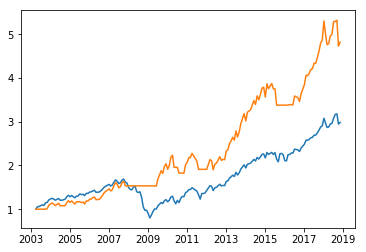

In [32]:
tr = np.cumprod(1 + data.leveraged_trade_returns.values)
r = np.cumprod(1 + data.returns.values)

plot(data.date, r)
plot(data.date, tr)